# 🏞 Convolutional Neural Network

In this notebook, we'll walk through the steps required to train your own convolutional neural network (CNN) on the CIFAR dataset

In [2]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/generative

import numpy as np

from tensorflow.keras import layers, models, optimizers, utils, datasets
from notebooks.utils import display

Mounted at /content/drive
/content/drive/MyDrive/generative


## 0. Parameters <a name="parameters"></a>

In [3]:
NUM_CLASSES = 10

## 1. Prepare the Data <a name="prepare"></a>

In [4]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [5]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

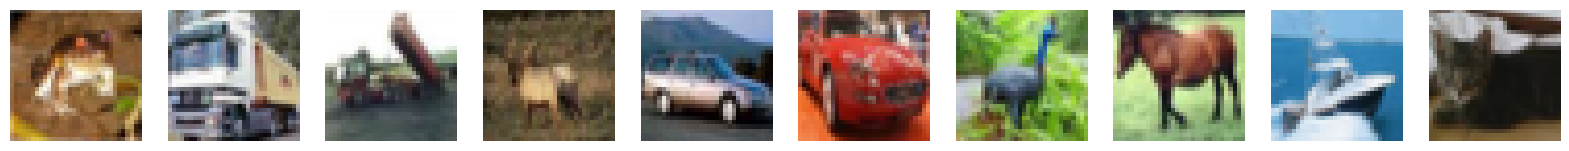

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [6]:
display(x_train[:10])
print(y_train[:10])

## 2. Build the model <a name="build"></a>

In [23]:
input_layer = layers.Input((32, 32, 3))

x = layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same")(
    input_layer
)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=32, kernel_size=3, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=64, kernel_size=3, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Flatten()(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate=0.5)(x)

x = layers.Dense(NUM_CLASSES)(x)
output_layer = layers.Activation("softmax")(x)

model = models.Model(input_layer, output_layer)

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_15 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_16 (Ba  (None, 16, 16, 32)        128       
 tchNormalization)                                         

## 3. Train the model <a name="train"></a>

In [24]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

In [25]:
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True,
    validation_data=(x_test, y_test),
)

Epoch 1/10
1563/1563 [==============================] - 15s 8ms/step - loss: 1.5378 - accuracy: 0.4624 - val_loss: 1.2077 - val_accuracy: 0.5655
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1188 - accuracy: 0.6056 - val_loss: 1.2268 - val_accuracy: 0.5745
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9844 - accuracy: 0.6551 - val_loss: 1.0424 - val_accuracy: 0.6274
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9106 - accuracy: 0.6824 - val_loss: 0.9129 - val_accuracy: 0.6814
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8429 - accuracy: 0.7079 - val_loss: 0.8704 - val_accuracy: 0.6970
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7976 - accuracy: 0.7200 - val_loss: 0.8442 - val_accuracy: 0.6997
Epoch 7/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.7487 - accuracy: 0.7382 - val_loss: 0.8762 - val_ac

## 4. Evaluation <a name="evaluate"></a>

In [26]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 0s 28ms/step - loss: 0.8266 - accuracy: 0.7201


[0.8266223669052124, 0.7200999855995178]

In [27]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 1s 2ms/step


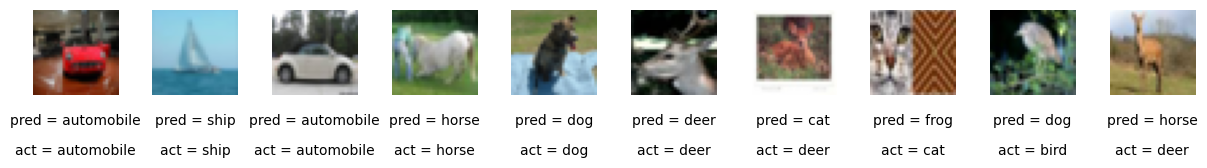

In [28]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)